# Truck 1 Analysis

#### Imports and global variables are defined here.

In [41]:
# Imports required for this notebook.
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Get rid of Pandas scientific notation string formatting
#pd.set_option('display.float_format', lambda x: '%.12f' % x)

# Local path to the CSV file containing the data for truck two (2).
truck1Path = "../data/trucks/truck1.csv"

# Local path to the column dictionary for truck two (2).
truck1DictPath = "../data/dictionary/truck1dict.csv"

#### Functions are defined here.
*NOTE: We need to discuss reusable code and how we're going to handle commonly-used functions.*

In [4]:
"""Uses Pandas's read_csv method to read a CSV file and returns a DataFrame of it to the notebook.
This function reads in all rows and defines the header row at index 0 by default."""
def readCsv(truck, records = None, index_col = None, columns = None):
    return pd.read_csv(truck, nrows = records, index_col = index_col, engine = 'c', skip_blank_lines = True)

"""Creates a Python dictionary from a pre-defined CSV dictionary.
This will only look at the first two columns of the given CSV file."""
def createPythonDictionary(dictionaryCSV):
    # Initialize the resulting dictionary.
    dictResult = {}
    
    # Opens the passed in CSV which defines the rename dictionary and iterates through it to store each value into a Python dictionary.
    with open(dictionaryCSV, 'r') as f:
        for row in csv.reader(f):
            dictResult.update({row[0]:row[1]})
    return dictResult

"""Returns a DataFrame without the UTC columns. Specific to the given Volvo truck data."""
def cullUtcCols(truckData):
    noUTC = truckData.drop(["UTC hour", "UTC minute", "UTC second", "UTC month", "UTC day", "UTC year"])
    return noUTC

"""Takes a DataFrame and a dictionary as parameters; uses the dictionary to rename all matching columns then
returns the changed DataFrame."""
def renameColumns(dataFrame, dictionary):
    return dataFrame.rename(columns = dictionary)

#### Notebook driver script from here on.

Reading in the truck data; one can change how many records are read by using "records = <#>" in the readCsv function or remove it entirely to read all records.

In [5]:
truck1Df = readCsv(truck1Path, index_col="Time")
truck1Df.index = pd.to_datetime(truck1Df.index)
truck1Df.head()

,1730_CH9_ AutomaticStartStop,1730_CH10_Truck_Batteries,4649_Ch1_Alternator_250A,4649_Ch2_BattOut_100A,4649_Ch3_Trailer_50A,4649_Ch4_Inverter_100A,4649_Ch5_Fridge_50A,4649_Ch6_200A_APU_BatteryBank,4649_Ch7_200A_BatterySeparator,4649_Ch8_APU_BatteryVoltage,...,WheelBasedVehicleSpeed,CPU load,UTC hour,UTC minute,UTC second,UTC month,UTC day,UTC year,GPS altitude,GPS speed
Time,,,,,,,,,,,,,,,,,,,,,
2019-08-07 07:54:02.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.968750,40.0,11.0,54.0,3.0,8.0,7.0,19.0,0.0,NaN
2019-08-07 07:54:03.059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.042969,40.0,11.0,54.0,3.0,8.0,7.0,19.0,0.0,NaN
2019-08-07 07:54:03.159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.042969,40.0,11.0,54.0,3.0,8.0,7.0,19.0,0.0,NaN
2019-08-07 07:54:03.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.105469,40.0,11.0,54.0,3.0,8.0,7.0,19.0,0.0,NaN
2019-08-07 07:54:03.359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.105469,40.0,11.0,54.0,3.0,8.0,7.0,19.0,0.0,NaN


Renaming the columns for better readability.

In [6]:
# Create a Python dictionary out of the CSV dictionary.
truck1Dict = createPythonDictionary(truck1DictPath)

truck1Df = renameColumns(truck1Df, truck1Dict)
truck1Df.head()

,1730 Automatic Start & Stop (V),1730 Batteries (V),4649 Alternator (A),4649 Battery Out (A),4649 Trailer (A),4649 Inverter (A),4649 Fridge (A),4649 Battery Bank (A),4649 Battery Separator (A),4649 Battery Voltage (V),...,Vehicle Speed (Wheel-Based; km/hr),CPU Load (%),UTC Hour,UTC Minute,UTC Second,UTC Month,UTC Day,UTC Year,Altitude(m),Speed (km/hr)
Time,,,,,,,,,,,,,,,,,,,,,
2019-08-07 07:54:02.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.968750,40.0,11.0,54.0,3.0,8.0,7.0,19.0,0.0,NaN
2019-08-07 07:54:03.059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.042969,40.0,11.0,54.0,3.0,8.0,7.0,19.0,0.0,NaN
2019-08-07 07:54:03.159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.042969,40.0,11.0,54.0,3.0,8.0,7.0,19.0,0.0,NaN
2019-08-07 07:54:03.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.105469,40.0,11.0,54.0,3.0,8.0,7.0,19.0,0.0,NaN
2019-08-07 07:54:03.359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.105469,40.0,11.0,54.0,3.0,8.0,7.0,19.0,0.0,NaN


Remove Columns with all NaN values

In [7]:
truck1Df.dropna(axis=1, how='all', inplace=True)

# Group the data by Day

In [29]:
day1 = truck1Df["2019-08-05"]
day2 = truck1Df["2019-08-06"]
day3 = truck1Df["2019-08-07"]
day4 = truck1Df["2019-08-08"]
day5 = truck1Df["2019-08-09"]
day6 = truck1Df["2019-08-10"]
day7 = truck1Df["2019-08-12"]

Days = [day1, day2, day3]

Get the distance traveled by day

In [9]:
def getDistance(df):
    newdf = df.resample('S').mean()                       #Convert to 100Hz using mean
    return round(newdf['Vehicle Speed (Wheel-Based; km/hr)'].sum()/3600, 1)

In [10]:
date = []
distance = []
for i in Days:
    date.append(i.index[1].date().strftime('%m-%d-%Y'))
    distance.append(getDistance(i))
    
distanceDf = pd.DataFrame(dict({'date':date, 'distance':distance}))
distanceDf.set_index('date')

,distance
date,
08-05-2019,872.5
08-06-2019,371.3
08-07-2019,781.8


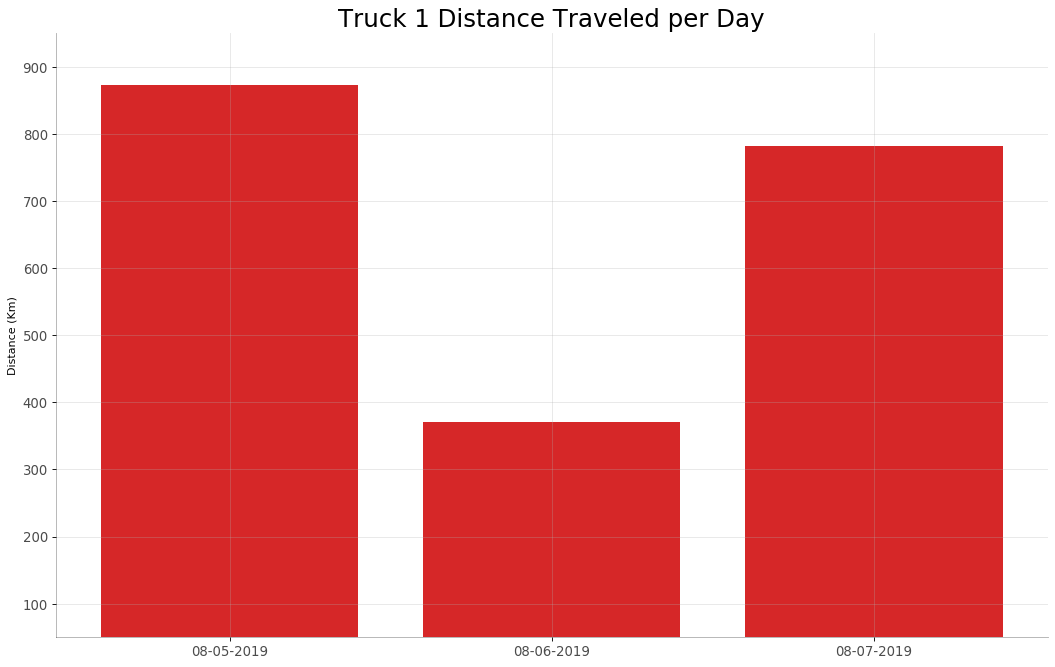

In [11]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.bar('date', 'distance', data=distanceDf, color='tab:red')

# Decoration
plt.ylim(50, 950)
xtick_location = distanceDf.index.tolist()[::1]
plt.xticks(ticks=xtick_location, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Truck 1 Distance Traveled per Day", fontsize=22)
plt.grid(axis='both', alpha=.3)
plt.ylabel("Distance (Km)")
# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

In [33]:
#day1['CPU Load (%)'].ffill().bfill()
day1.isnull().sum()/len(day1)

1730 Automatic Start & Stop (V)            0.224810
1730 Batteries (V)                         0.000264
4649 Alternator (A)                        0.000264
4649 Battery Out (A)                       0.000264
4649 Trailer (A)                           0.000264
4649 Inverter (A)                          0.000264
4649 Fridge (A)                            0.000264
4649 Battery Bank (A)                      0.000264
4649 Battery Separator (A)                 0.000264
4649 Battery Voltage (V)                   0.000264
Engine Output Torque (%)                   0.000000
HiRes Engine Output Torque (%)             0.000000
Outside Air Temperature (C)                0.000012
Urea Tank Temperature (C)                  0.000974
Outside Air Pressure (kPa)                 0.000000
Boost Pressure (kPa)                       0.000000
Cruise Control Speed (km/hr)               0.257377
Driver Requested Torque (%)                0.000000
Temperature of Engine Byproducts (C)       0.000000
Temperature 

In [34]:
day1['CPU Load (%)'].describe()

count    401610.000000
mean         48.154334
std           7.512026
min          28.000000
25%          42.000000
50%          47.000000
75%          55.000000
max          98.000000
Name: CPU Load (%), dtype: float64

In [37]:
day1byminutes = day1.resample('S').mean()
day1byminutes['CPU Load (%)'].describe()

count    40172.000000
mean        48.155127
std          5.985329
min         30.000000
25%         44.000000
50%         48.000000
75%         52.200000
max         96.000000
Name: CPU Load (%), dtype: float64

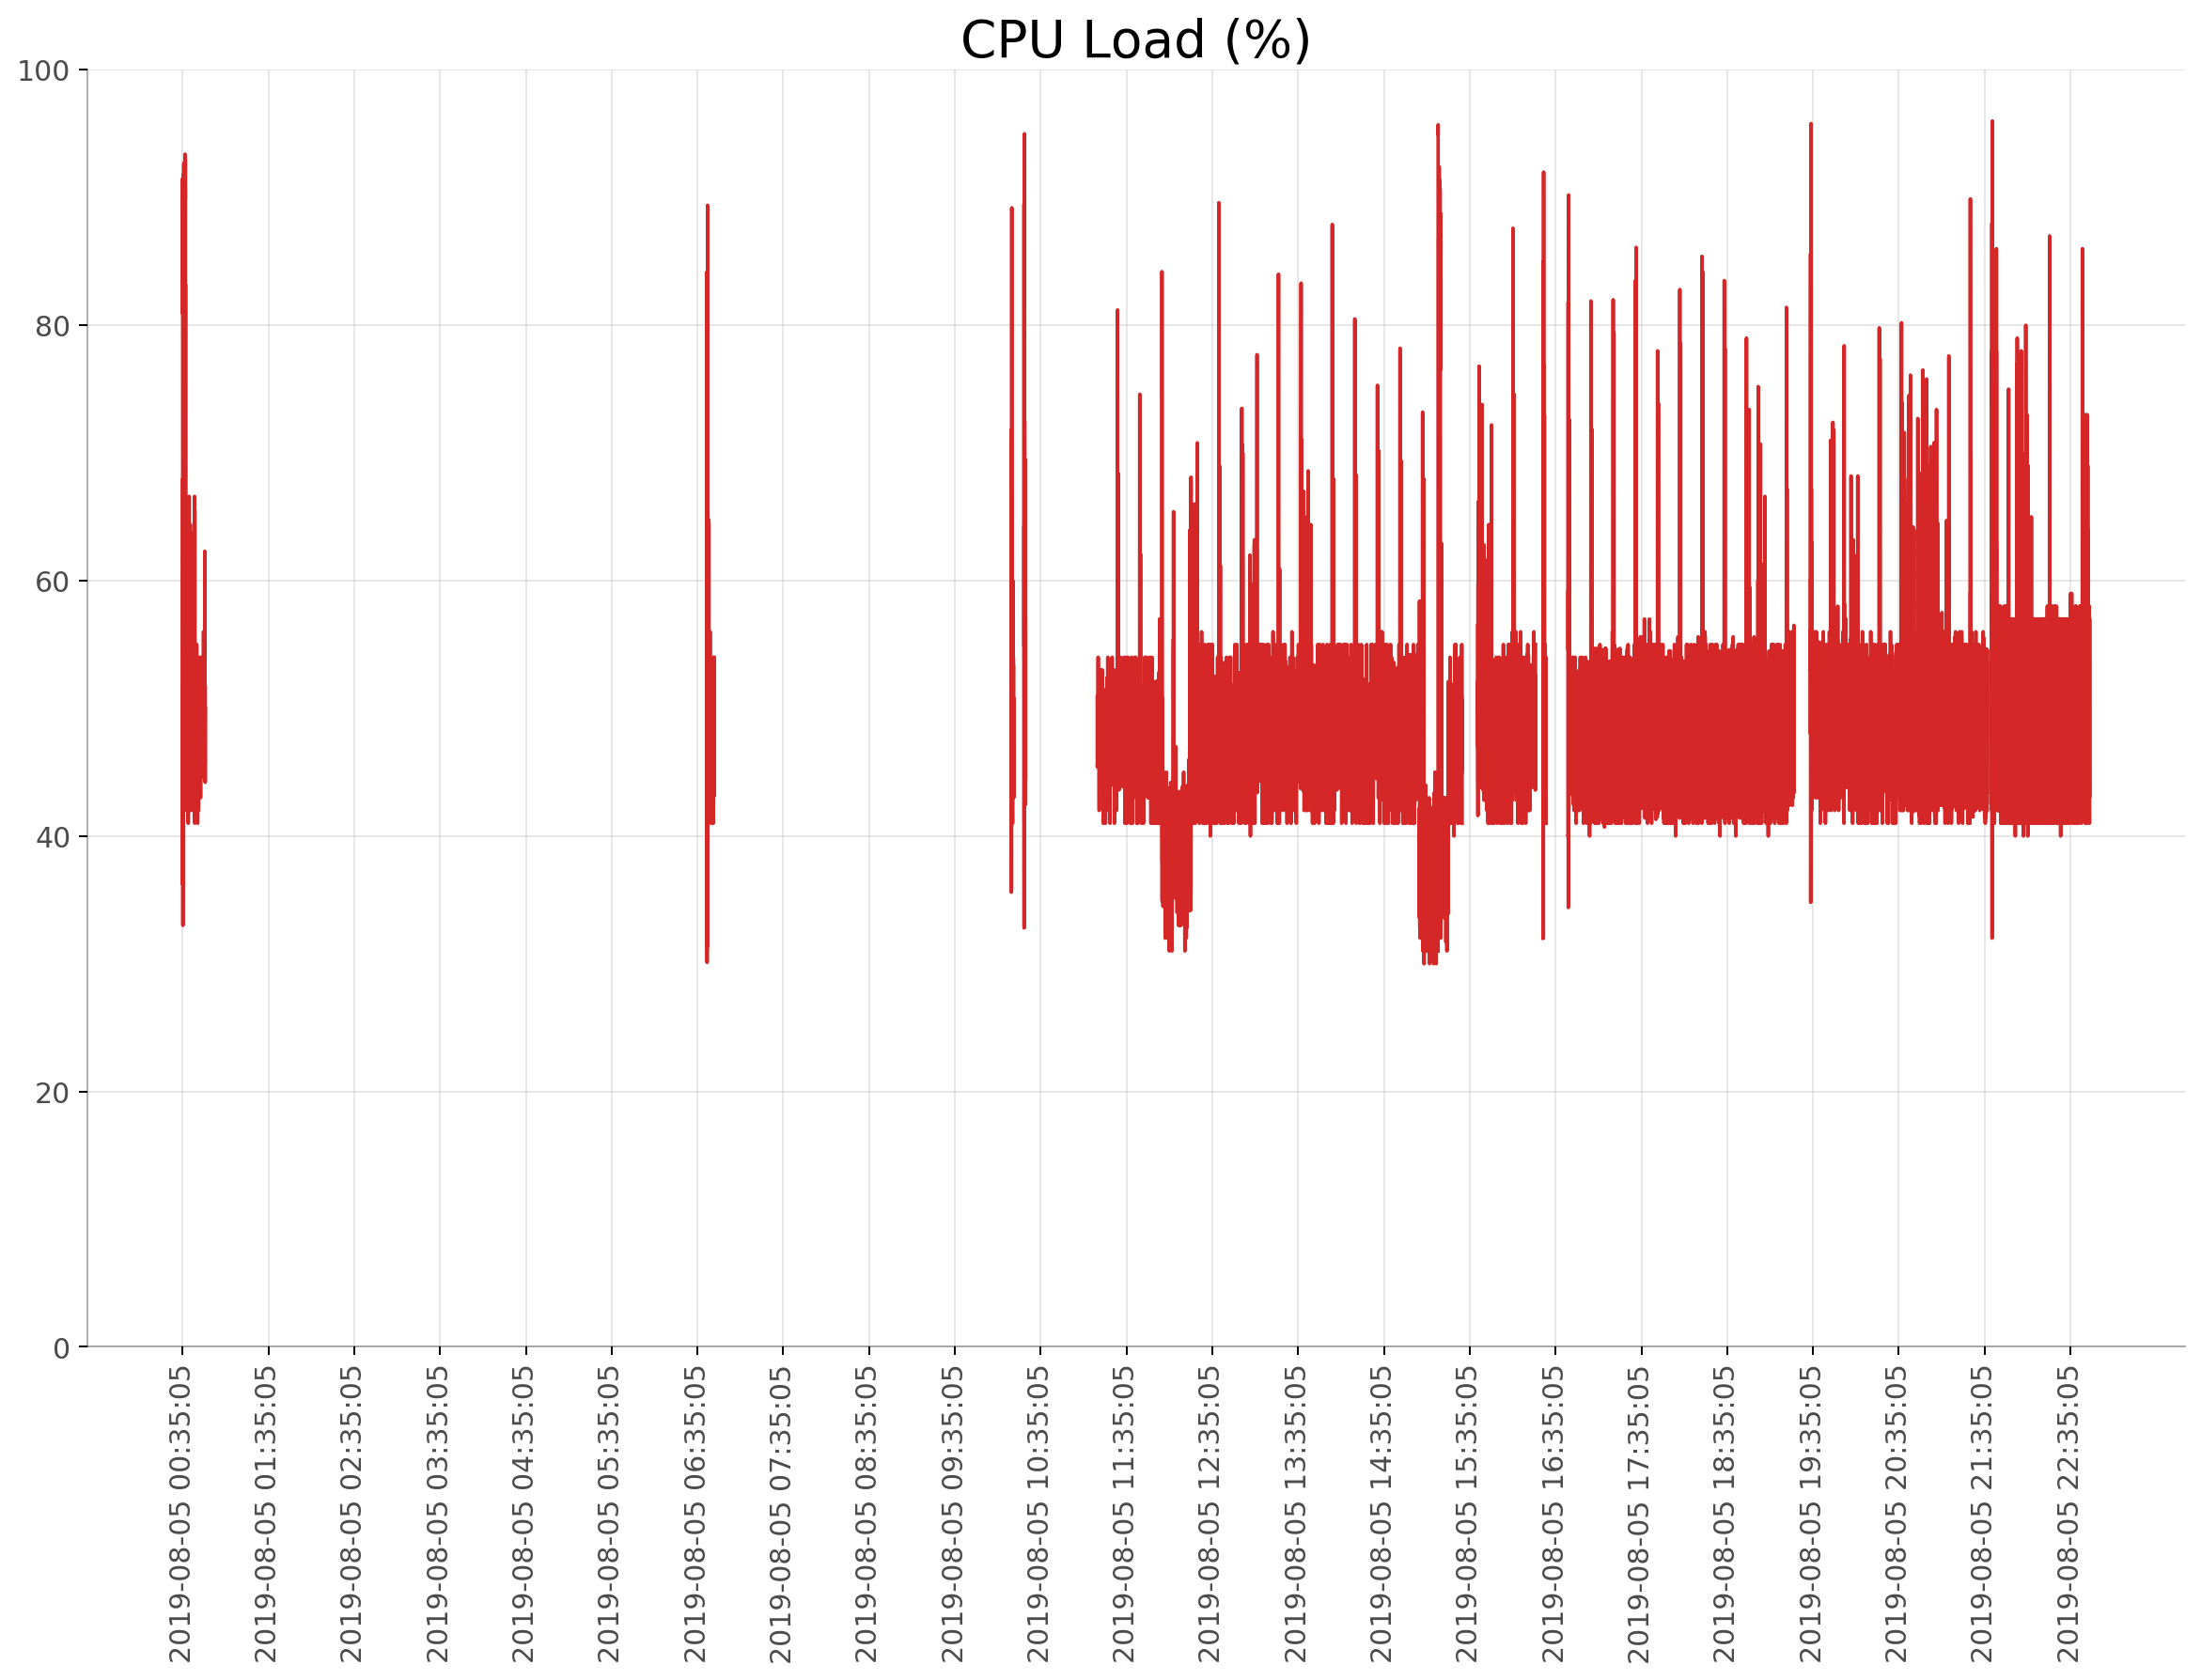

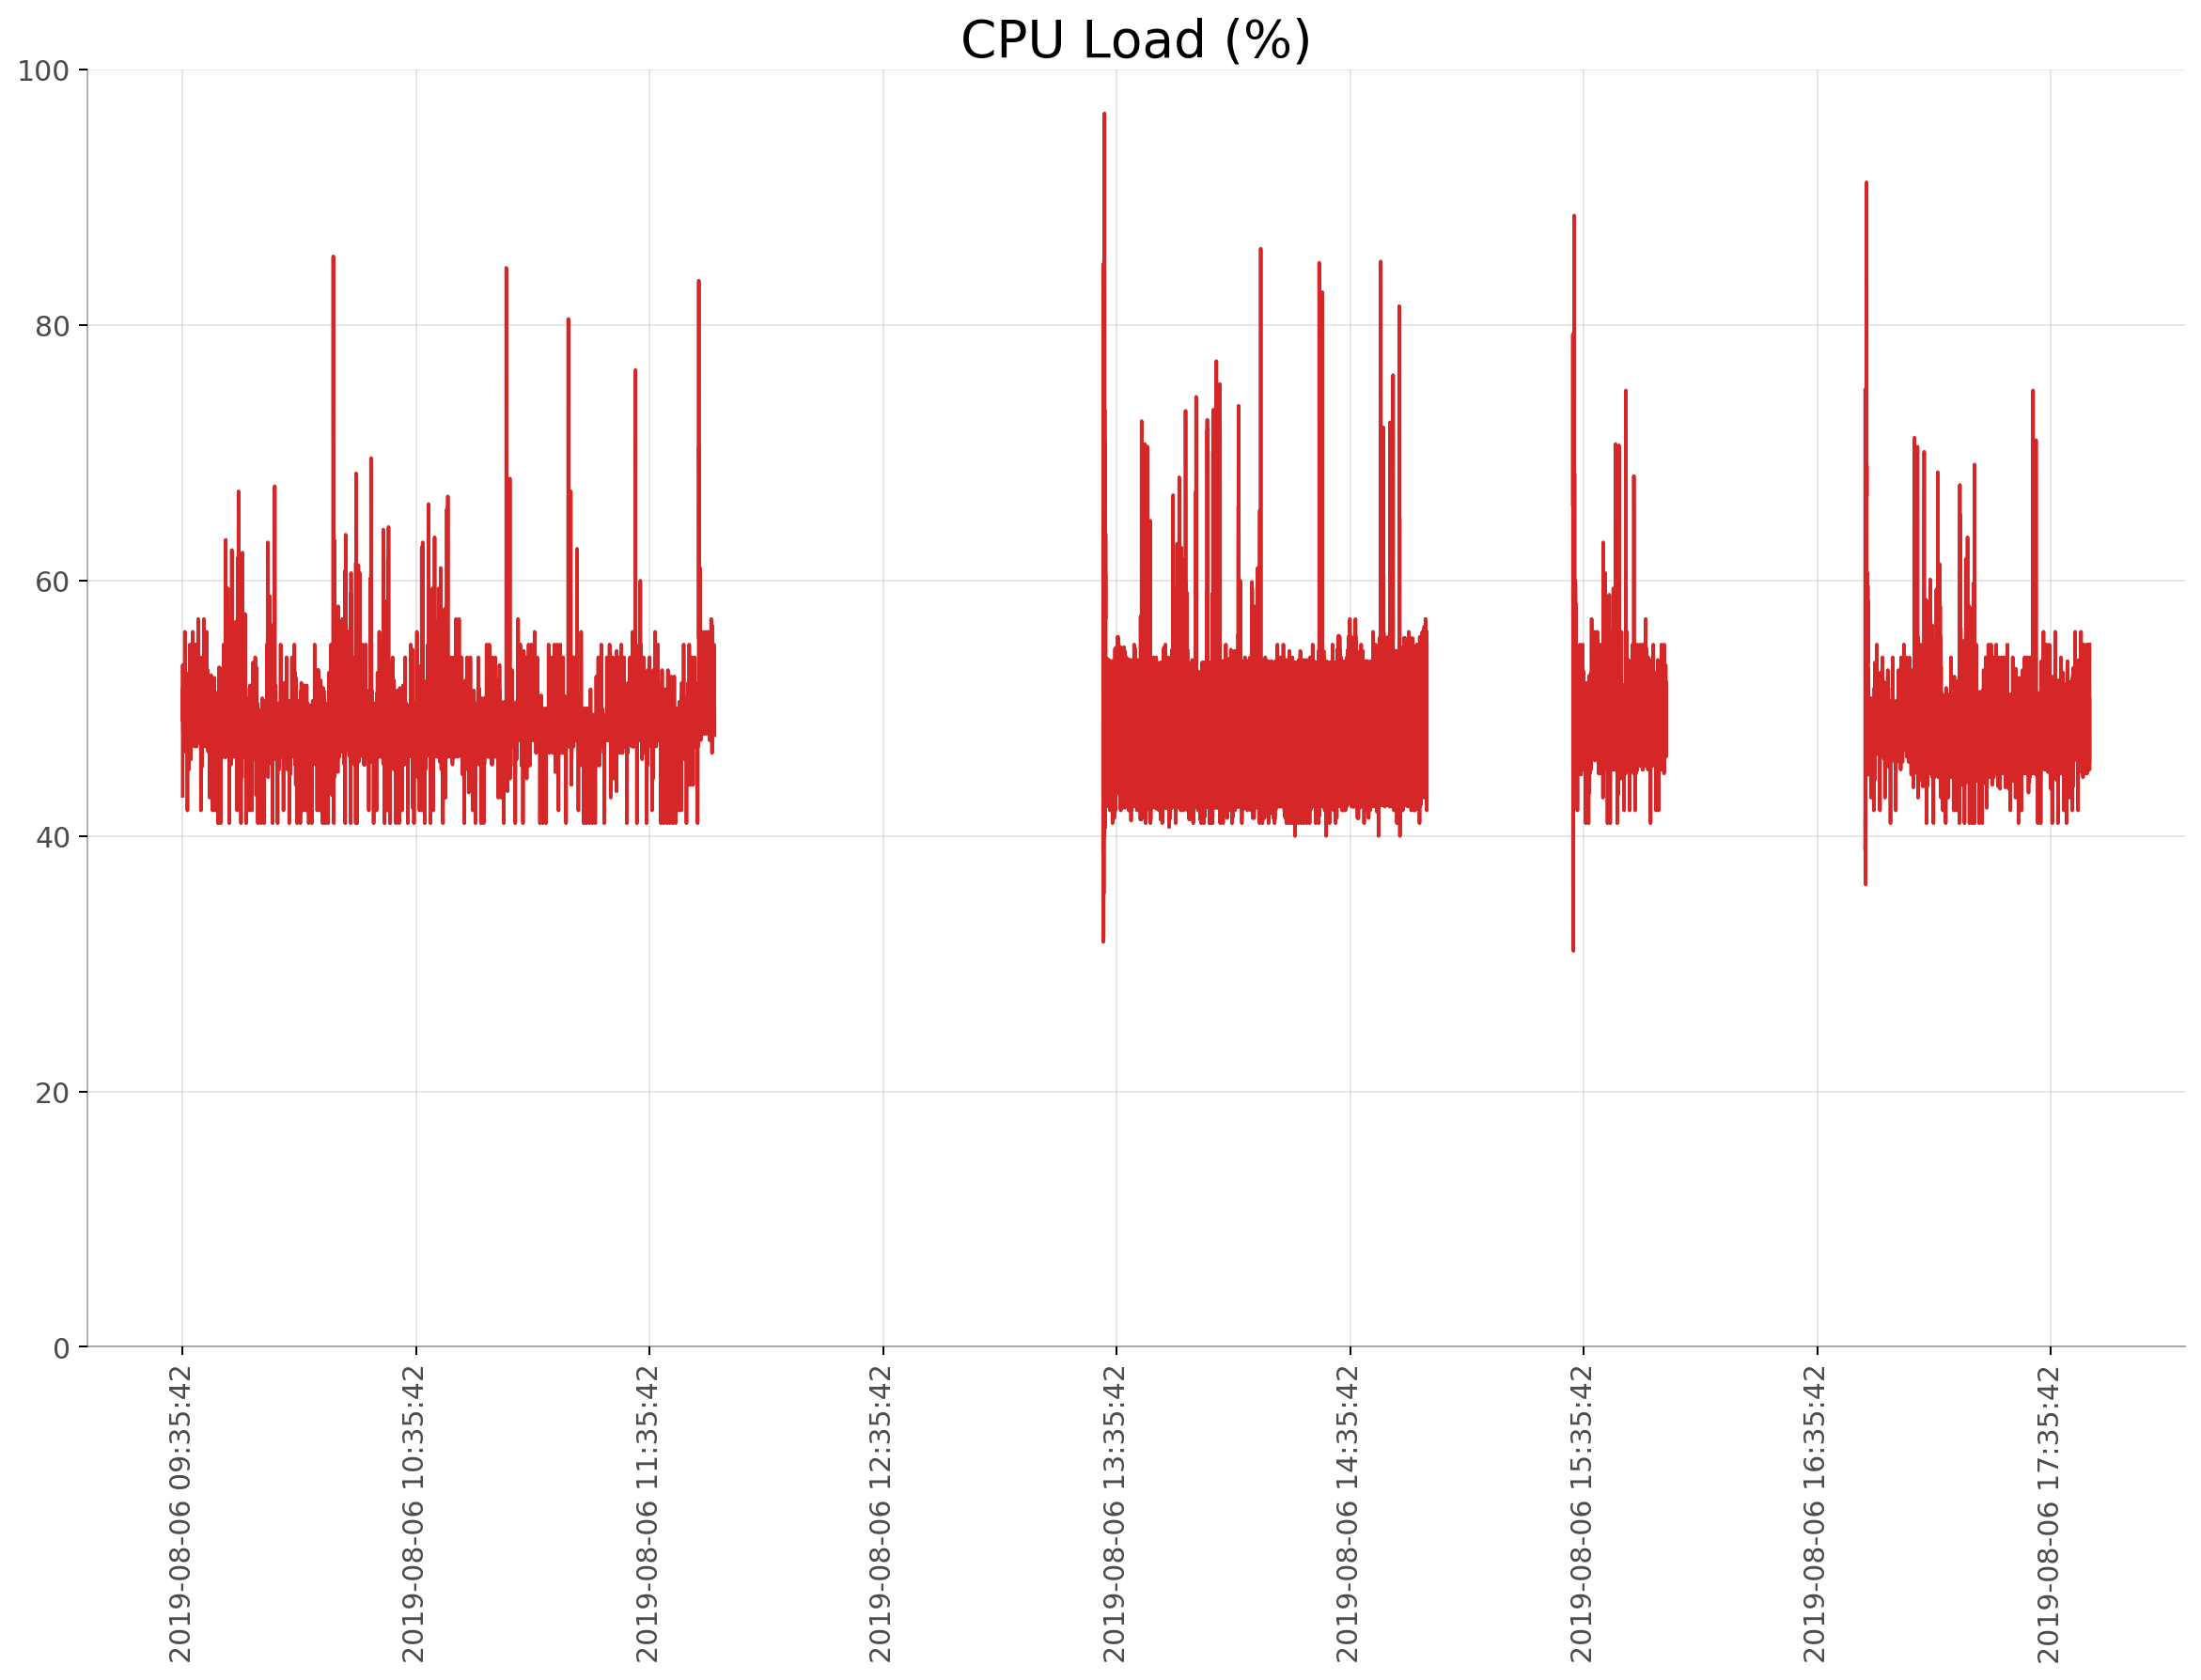

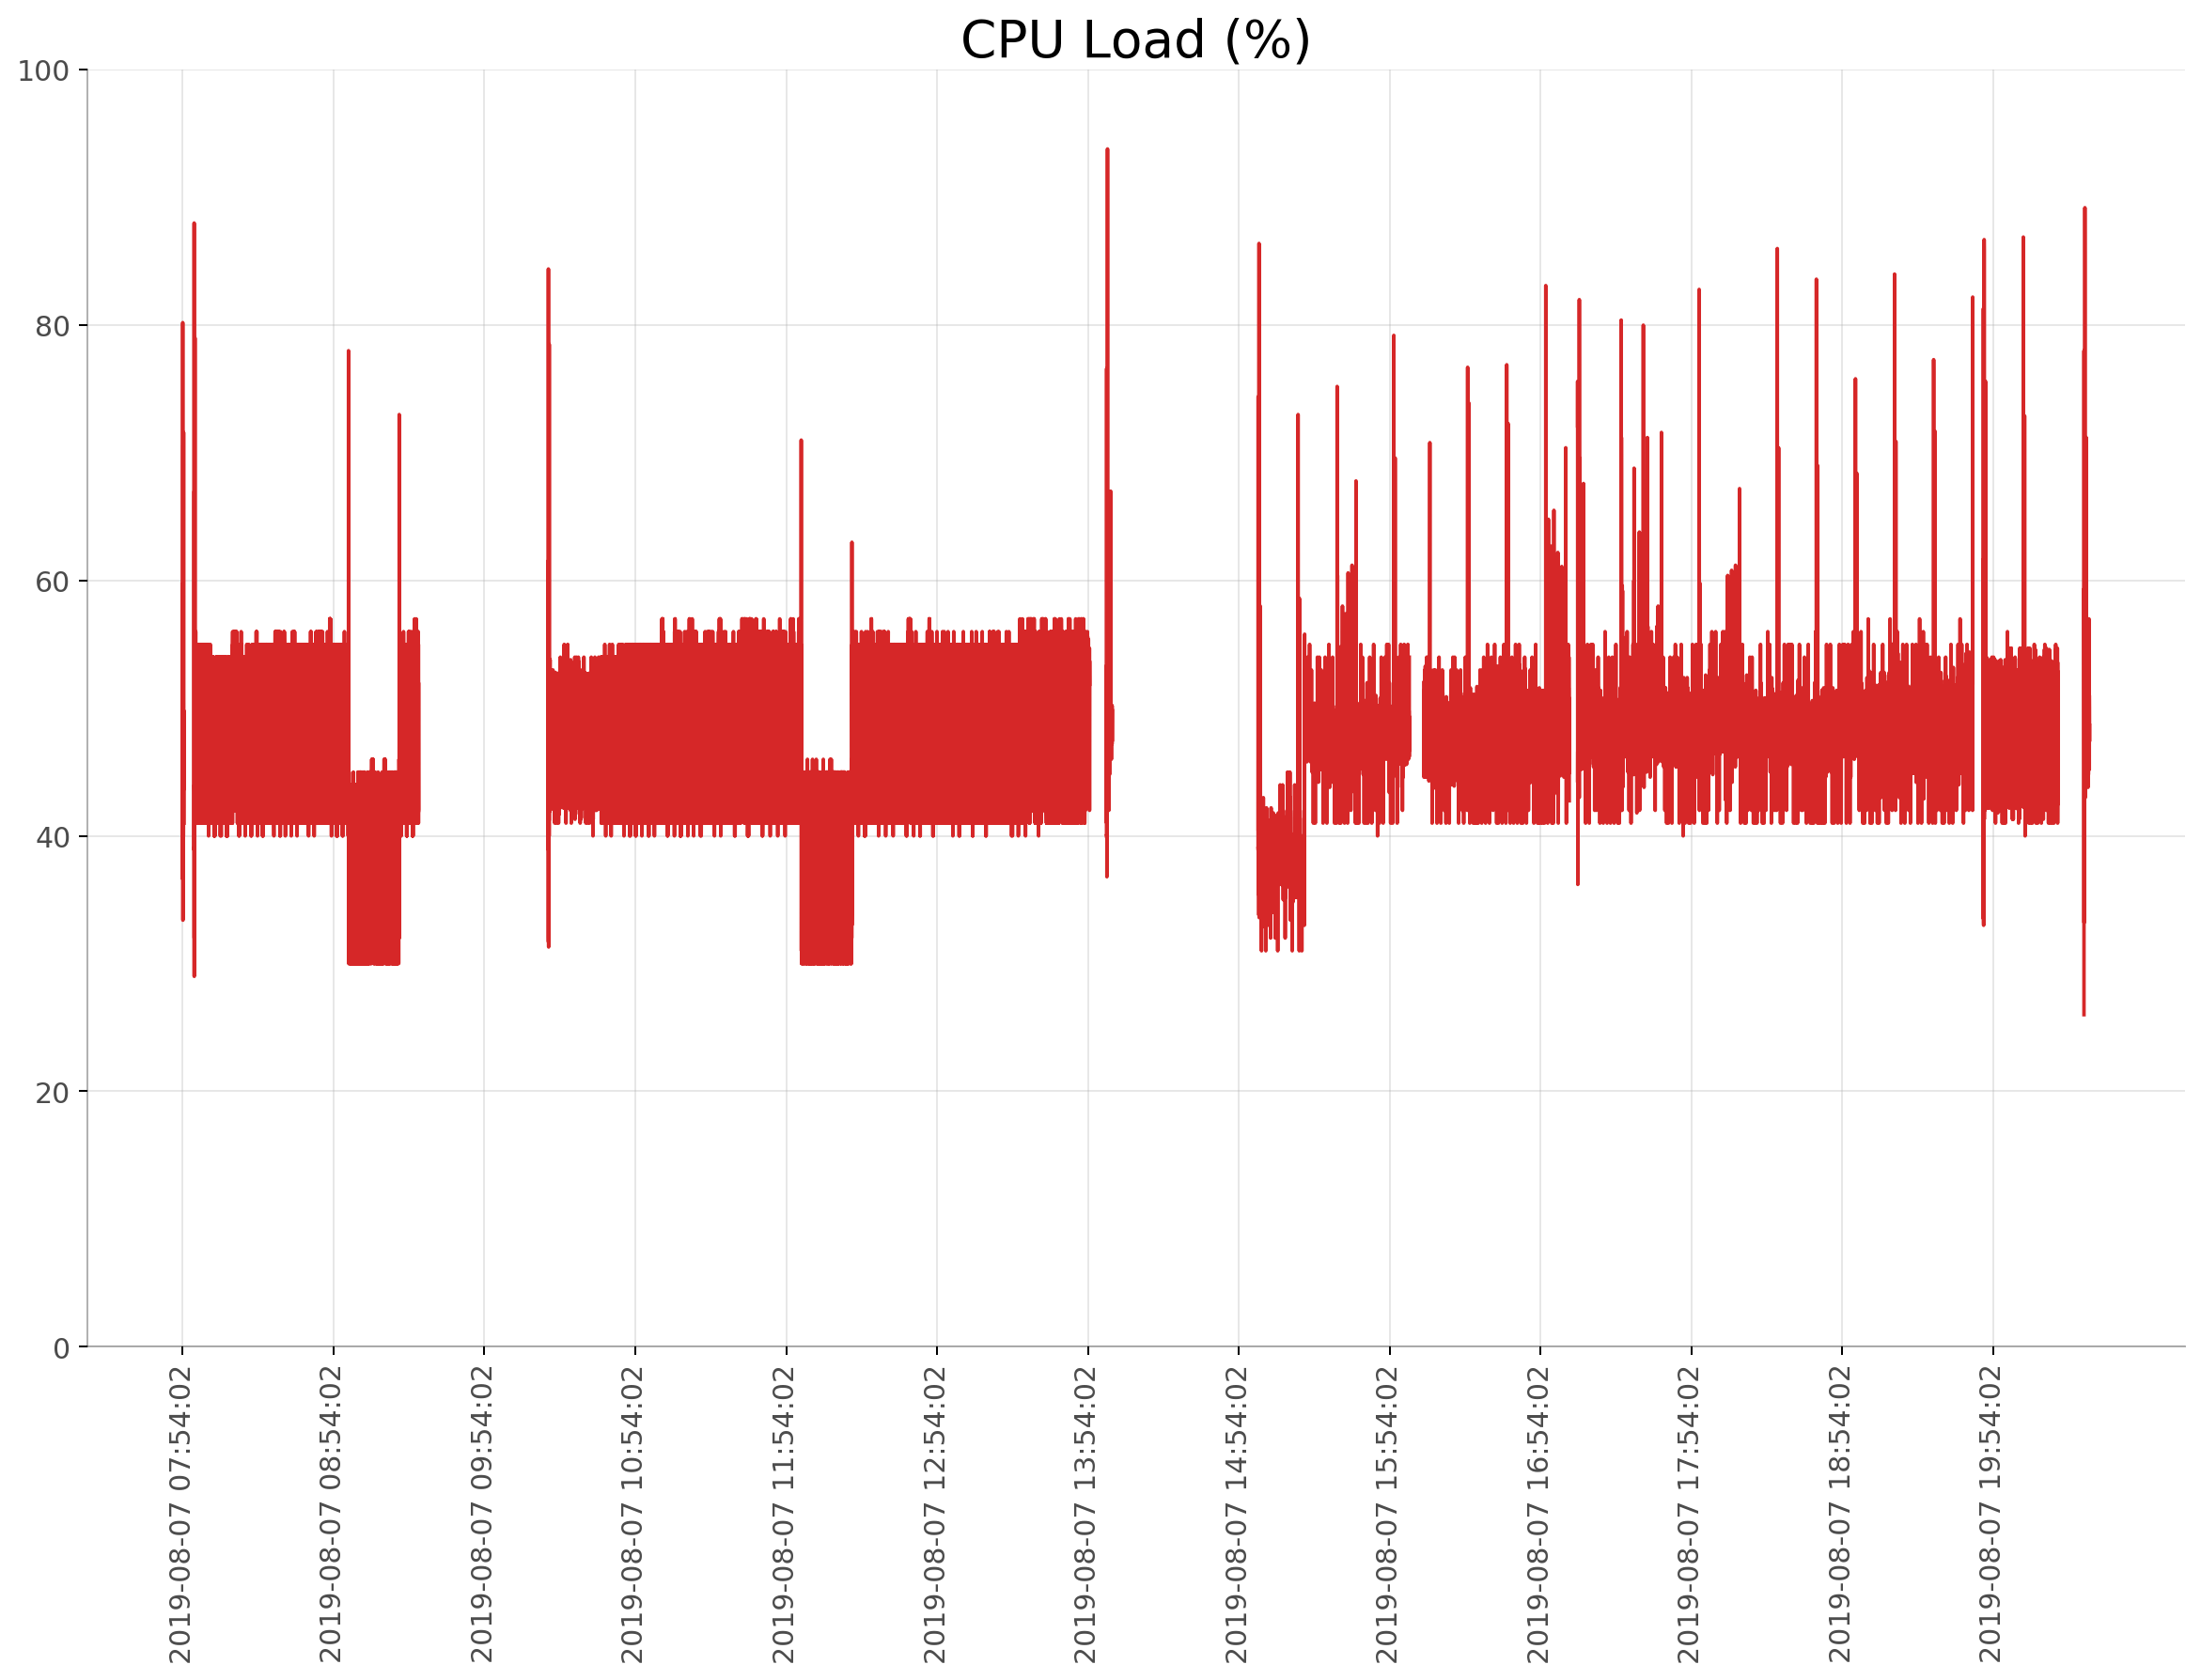

In [53]:
for i in Days:
    daybyminutes = i.resample('S').mean()
    thedate = (i.index[1].date().strftime('%m-%d-%Y'))

    # Draw Plot
    plt.figure(figsize=(16,10), dpi= 180)
    plt.plot(daybyminutes.index, "CPU Load (%)", data=daybyminutes, color='tab:red')

    # Decoration
    plt.ylim(0, 100)
    xtick_location = daybyminutes.index.tolist()[::3600]
    xtick_labels = daybyminutes.index.tolist()[::3600]
    plt.xticks(ticks=xtick_location,labels=xtick_labels, rotation=90, fontsize=12, horizontalalignment='center', alpha=.7)
    plt.yticks(fontsize=12, alpha=.7)
    plt.title("CPU Load (%)", fontsize=22)
    plt.grid(axis='both', alpha=.3)

    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

##### GPS Speed vs. Wheel-Based Speed
Selecting the GPS Speed and Wheel-Based Speed columns.

In [199]:
day1.shape

(401610, 46)

In [198]:
columns = ['Time (DateTime)', 'Speed (km/hr)', 'Vehicle Speed (Wheel-Based; km/hr)']
gpsVsWheel = truck1Df[columns].head()
gpsVsWheel.head()
# Stopping here; plotting this data would be much more effective if it was per day. We should discuss this point before proceeding.

KeyError: "['Time (DateTime)'] not in index"